In [8]:
from sktime.transformations.series import acf
import pandas as pd

In [6]:
from sktime.transformations.series.acf import AutoCorrelationTransformer
from sktime.datasets import load_airline
y = load_airline()  
transformer = AutoCorrelationTransformer(n_lags=12)  
y_hat = transformer.fit_transform(y)
y_hat

0     1.000000
1     0.948047
2     0.875575
3     0.806681
4     0.752625
5     0.713770
6     0.681734
7     0.662904
8     0.655610
9     0.670948
10    0.702720
11    0.743240
12    0.760395
dtype: float64

In [12]:
transformer.fit_transform(pd.Series([1,2,1,2,1,1,7]))

0    1.000000
1   -0.124470
2   -0.095474
3    0.032532
4   -0.141443
5    0.021216
6   -0.192362
dtype: float64

In [15]:
from sktime.transformations.series.matrix_profile import MatrixProfileTransformer
from sktime.datasets import load_airline
y = load_airline()
transformer = MatrixProfileTransformer()  
y_hat = transformer.fit_transform(y)  

<AxesSubplot:>

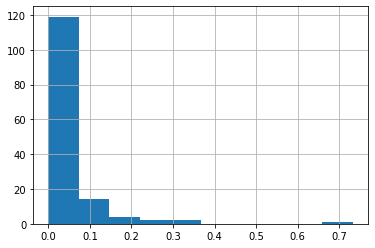

In [19]:
y_hat.hist()

<AxesSubplot:>

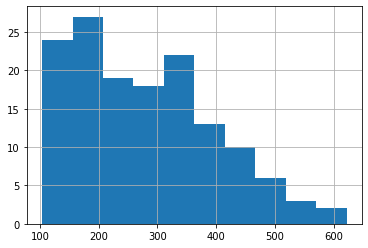

In [18]:
y.hist()

In [40]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create sample demand forecasting data with multiple outputs
X, y = make_regression(n_samples=1000, n_features=5, n_targets=3, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regressor with multi-output support
reg = xgb.XGBRegressor(objective='reg:squarederror')  # Automatic multi-output handling

# Fit the model to the training data
reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = reg.predict(X_test)

# Evaluate multi-output model performance
mse_1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])
mse_3 = mean_squared_error(y_test[:, 2], y_pred[:, 2])

print("Mean Squared Error for Output 1:", mse_1)
print("Mean Squared Error for Output 2:", mse_2)
print("Mean Squared Error for Output 3:", mse_3)


Mean Squared Error for Output 1: 416.8621598414547
Mean Squared Error for Output 2: 629.3770512223261
Mean Squared Error for Output 3: 977.4955916631702


In [57]:
pd.DataFrame({'foo':[1,2,3,4], 'bar':[4,5,6,100]}).expanding(method='single').skew()

,foo,bar
0,NaN,NaN
1,NaN,NaN
2,0.0,-1.227818e-11
3,0.0,1.998228e+00
